### 1) Генерация ряда

In [2]:
import numpy as np
from datetime import datetime, timedelta


def generate_time_series(n_points=1000, has_trend=True, has_seasonality=True, seed=None):
    """
    Генерирует временной ряд со случайными параметрами без использования
    Pandas
    Параметры:
    ----------
    n_points : int
    Количество точек данных
    has_trend : bool
    Добавлять ли тренд
    has_seasonality : bool
    Добавлять ли сезонность
    seed : int или None
    Seed для воспроизводимости
    Возвращает:
    -----------
    tuple: (dates, values) где dates - список строк дат, values - список
    значений
    """
    
    if seed is not None:
        np.random.seed(seed)
        
    # Генерируем временные метки (ежедневные данные начиная с 2020-01-01)
    start_date = datetime(2020, 1, 1)
    dates = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(n_points)]
    
    # Базовый шум (случайная компонента)
    noise = np.random.normal(0, 5, n_points)
    
    # Инициализируем компоненты
    trend_component = np.zeros(n_points)
    seasonal_component = np.zeros(n_points)
    
    # Генерируем тренд, если требуется
    if has_trend:
        # Случайно выбираем тип тренда: линейный, квадратичный или логарифмический
        trend_type = np.random.choice(['linear', 'quadratic', 'logarithmic'])

        if trend_type == 'linear':
            # Линейный тренд: y = mx + b
            slope = np.random.uniform(-0.5, 0.5) # случайный наклон
            intercept = np.random.uniform(50, 100) # случайное начальное значение
            trend_component = slope * np.arange(n_points) + intercept
            
        elif trend_type == 'quadratic':
            # Квадратичный тренд: y = ax^2 + bx + c
            a = np.random.uniform(-0.001, 0.001)
            b = np.random.uniform(-0.1, 0.1)
            c = np.random.uniform(50, 100)
            x = np.arange(n_points)
            trend_component = a * x**2 + b * x + c
            
        else: # logarithmic
            # Логарифмический тренд: y = a*log(x+1) + b
            a = np.random.uniform(10, 30)
            b = np.random.uniform(50, 100)
            trend_component = a * np.log(np.arange(n_points) + 1) + b
        
    # Генерируем сезонность, если требуется
    if has_seasonality:
        # Случайное количество сезонных компонент (1-3)
        n_seasons = np.random.randint(1, 4)
        
        for _ in range(n_seasons):
            # Случайные параметры для каждой сезонной компоненты
            amplitude = np.random.uniform(10, 30) # амплитуда
            period = np.random.uniform(30, 365) # период в днях
            phase = np.random.uniform(0, 2*np.pi) # фаза
            
            # Создаем сезонную компоненту (синусоида)
            seasonal_component += amplitude * np.sin(2*np.pi*np.arange(n_points)/period + phase)
        
    # Комбинируем все компоненты
    values = noise + trend_component + seasonal_component
    
    return dates, values

2) Отрисовка ряда

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_time_series(dates, values, figsize=(14, 6)):
    """
    Визуализирует временной ряд без использования Pandas
    Параметры:
    ----------
    dates : list
    Список дат в строковом формате
    values : list или np.array
    Список значений временного ряда
    figsize : tuple
    Размер фигуры
    """
    
    # Преобразуем строки дат в объекты datetime для matplotlib
    date_objects = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in dates]
    
    plt.figure(figsize=figsize)
    
    # Строим график временного ряда
    plt.plot(date_objects, values, label='Временной ряд', color='blue', linewidth=1.5)
    plt.title('Сгенерированный временной ряд', fontsize=16, fontweight='bold')
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Значение', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Автоматически форматируем ось X для дат
    plt.gcf().autofmt_xdate()
    
    # Добавляем информацию о данных
    values_array = np.array(values)
    stats_text = f"Всего точек: {len(values)}\nСреднее: {np.mean(values_array):.2f}\nСтандартное отклонение: {np.std(values_array):.2f}"
    plt.figtext(0.02, 0.02, stats_text, fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
    
    plt.tight_layout()
    
    plt.show()

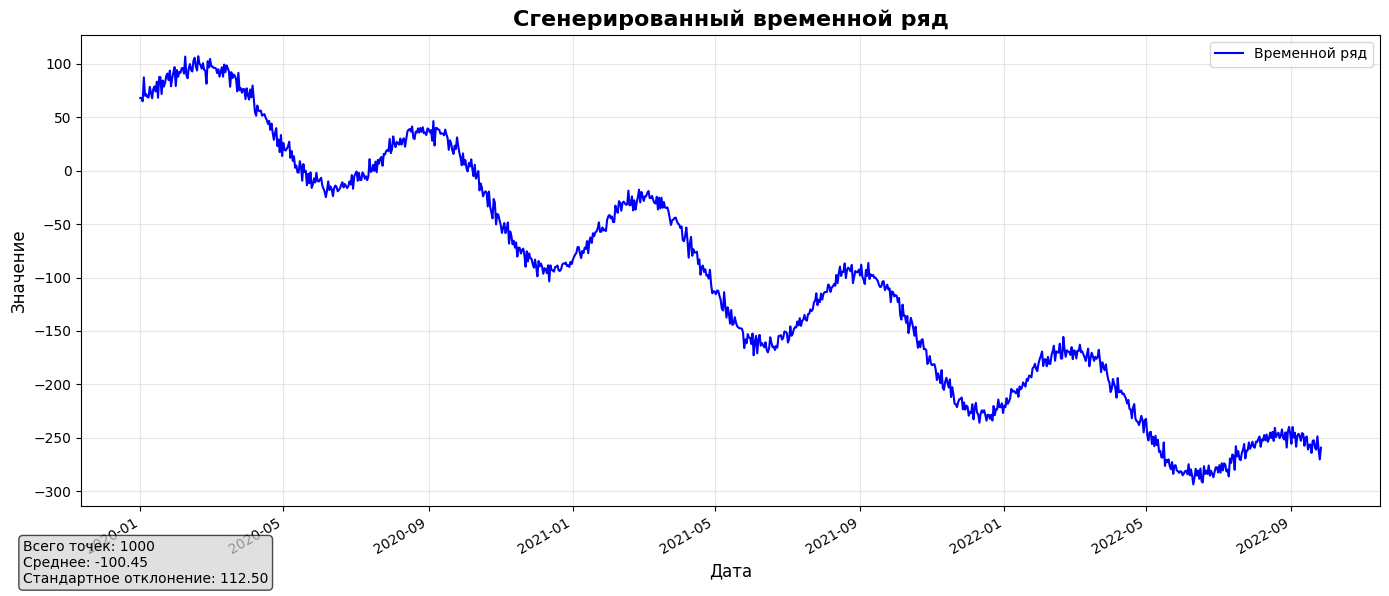

In [5]:
dates, values = generate_time_series()

values = np.array(values)

plot_time_series(dates, values)

### 3) Провести классические статистические тесты.
   Проведём тесты: ADF, KPSS.

Тест ADF

In [7]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(values)
print(f"ADF statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF statistic: -2.081423527409797
p-value: 0.25204959861392506


Проверка ряда на стационарность с помощью расширенного теста Дики-Фуллера (ADF) подтверждает его нестационарность: p-value значительно превышает допустимый уровень значимости 0.05. Следовательно, ряд нестационарен.

Тест KPSS

In [8]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, _, _ = kpss(values, regression='c')
print(f"KPSS statistic: {kpss_stat:.4f}")
print(f"p-value: {p_value:.4f}")

KPSS statistic: 4.6977
p-value: 0.0100


C:\Users\yura0\AppData\Local\Temp\ipykernel_38724\1304655119.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, _, _ = kpss(values, regression='c')


Т.к. p-value < 0.5, то мы отвергаем нулевую гипотезу о том что ряд стационарен.
Нестационарность подтверждается надёжно.

### 4) Разложение временного ряда на компоненты

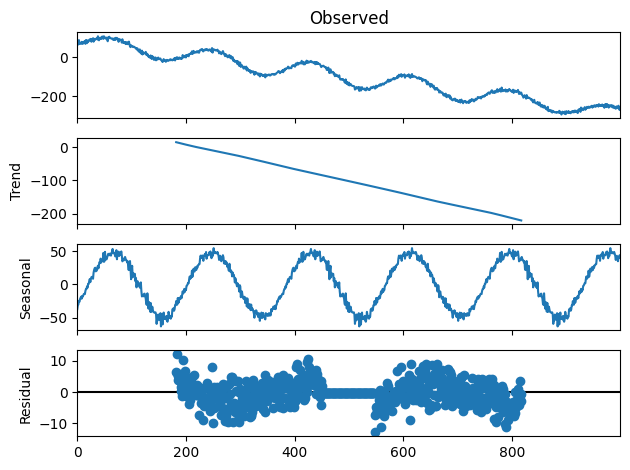

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(values, model='additive', period=365)
decomposition.plot()
plt.show()

Выше приведены 3 графика: тренд, сезонность и шум.

### 5) Отрисовать автокорреляционные функции

<Figure size 640x480 with 0 Axes>

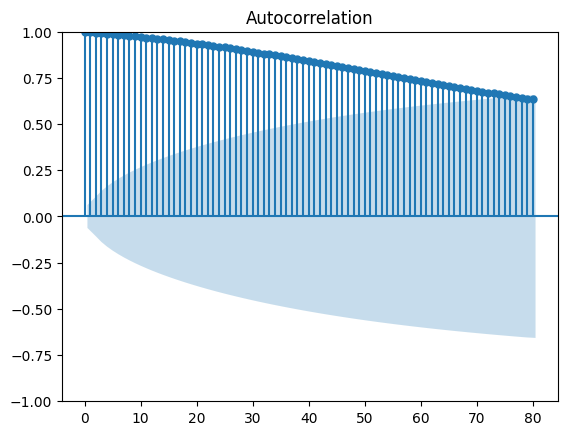

<Figure size 640x480 with 0 Axes>

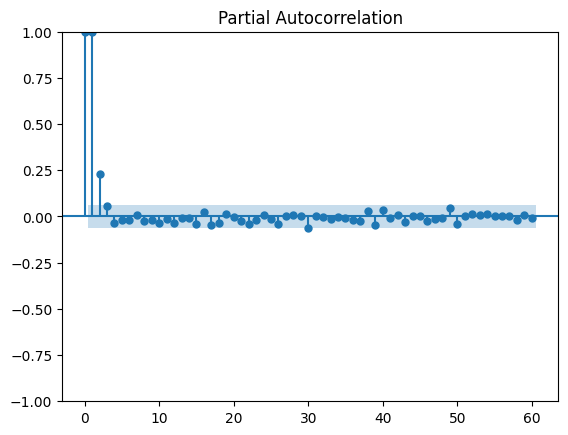

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
plot_acf(values, lags=80)
plt.show()

plt.figure()
plot_pacf(values, lags=60)
plt.show()

### 6) Моделирование
Исходный временной ряд демонстрирует одновременно тренд и сезонность, а также не является стационарным, что подтверждено тестами ADF и KPSS.
В связи с этим целесообразно использовать сезонную модель SARIMA, которая позволяет учитывать тренд и сезонность.


// order cмотрим на Par... на последнюю значимаю пик, потом всегда 1 т.к нестационарный ряд, а нам нужно его диференцировать, 
//3тий это первый график, тк нет резкого падения берём 1

In [ ]:
seasonal_order 12 тк у нас месячные данные, 2рой 0 тк сезнонность не скачет, 1-й мы смотрим на последнюю значимый пик кратный сезонности лаго(12), 3-й

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    values,
    order=(3, 1, 1),
    seasonal_order=(6, 0, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1000
Model:             SARIMAX(3, 1, 1)x(6, 0, [], 12)   Log Likelihood               -2944.242
Date:                             Mon, 22 Dec 2025   AIC                           5910.484
Time:                                     19:43:52   BIC                           5963.599
Sample:                                          0   HQIC                          5930.749
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4424      0.189     -2.345      0.019      -0.812      -0.073
ar.L2         -0.2408      0.136     -1.776      0.076      -0.507       0.025
ar.L3         -0.0662      0.076     -0.871      0.384      -0.215       0.083
ma.L1         -0.2932      0.191     -1.534      0.125      -0.668       0.081
ar.S.L12       0.1369      0.034      4.015      0.000       0.070       0.204
ar.S.L24       0.1784      0.034      5.188      0.000       0.111       0.246
ar.S.L36       0.0937      0.033      2.799      0.005       0.028       0.159
ar.S.L48      -0.0619      0.033     -1.872      0.061      -0.127       0.003
ar.S.L60      -0.0693      0.033     -2.086      0.037      -0.134      -0.004
ar.S.L72      -0.1178      0.033     -3.569      0.000      -0.182      -0.053
sigma2        34.2894      1.614     21.240      0.000      31.125      37.453
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 4.53
Prob(Q):                              0.55   Prob(JB):                         0.10
Heteroskedasticity (H):               0.86   Skew:                            -0.16
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 7) Анализ метрик

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test = values[-90:]
fit = model.fit(disp=False)
pred = fit.forecast(90)

mae = mean_absolute_error(test, pred)
print(mae)

16.90011961148271


In [31]:
rmse = np.sqrt(mean_squared_error(test, pred))
print(rmse)

18.764766110510244


метрики указывают на умеренный уровень точности предсказаний.

### 8) Отрисовка конечного результата


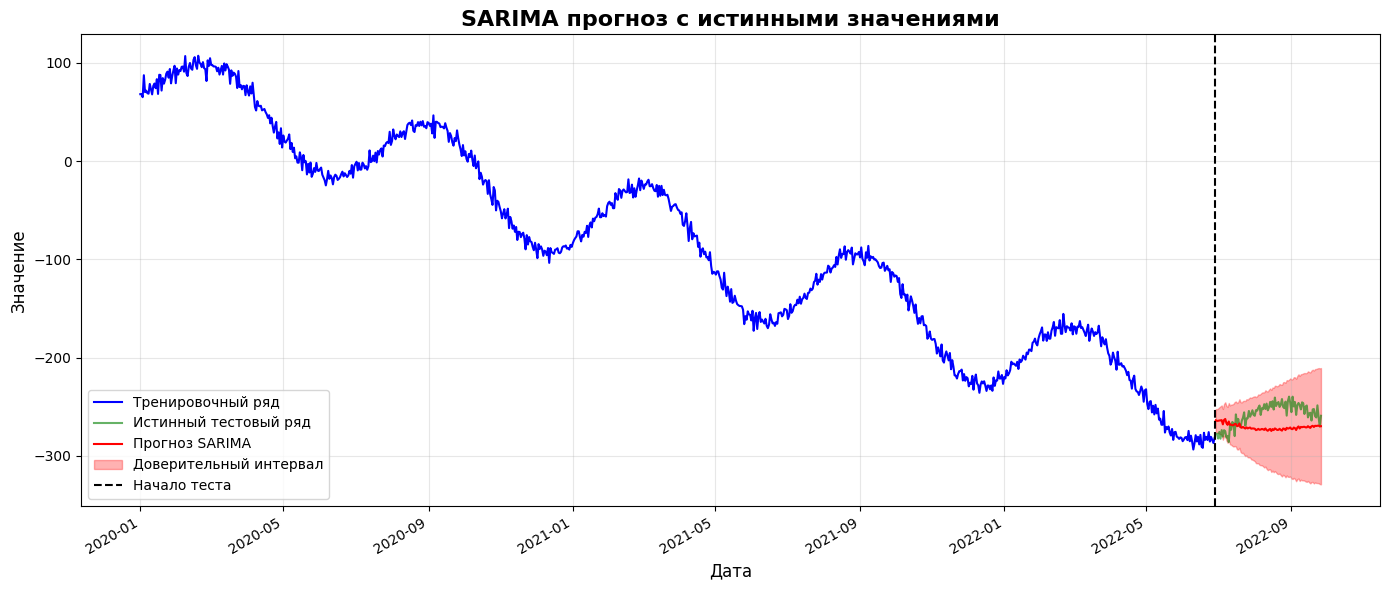

In [54]:
# Параметры
train_size = len(values) - 90  # длина тренировочного ряда

# Даты
train_dates = [datetime.strptime(d, '%Y-%m-%d') for d in dates[:train_size]]
test_dates = [datetime.strptime(d, '%Y-%m-%d') for d in dates[train_size:]]

# Прогноз на тестовый период
forecast = model_fit.get_forecast(steps=len(test_dates))
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# График
plt.figure(figsize=(14, 6))

# Исторический ряд
plt.plot(train_dates, values[:train_size], label="Тренировочный ряд", color="blue")
plt.plot(test_dates, values[train_size:], label="Истинный тестовый ряд", color="green", alpha=0.6)

# Прогноз на тест
plt.plot(test_dates, pred, color="red", label="Прогноз SARIMA")
plt.fill_between(test_dates, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3, label="Доверительный интервал")

# Разделение тренировочного и тестового периода
plt.axvline(train_dates[-1], color="black", linestyle="--", label="Начало теста")

plt.title("SARIMA прогноз с истинными значениями", fontsize=16, fontweight='bold')
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Значение", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame({
    'date': pd.to_datetime(dates),
    'value': values
})
df = df.set_index('date')
df.to_csv('time_series.csv')